In [1]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print("Setup Complete")

Setup Complete


In this exercise, you will use your new knowledge to propose a solution to a real-world scenario.  To succeed, you will need to import data into Python, answer questions using the data, and generate **scatter plots** to understand patterns in the data.

## Scenario

You work for a major candy producer, and your goal is to write a report that your company can use to guide the design of its next product.  Soon after starting your research, you stumble across this [very interesting dataset](https://fivethirtyeight.com/features/the-ultimate-halloween-candy-power-ranking/) containing results from a fun survey to crowdsource favorite candies.

在本练习中，您将使用新知识为现实世界中的情景提出解决方案。  要取得成功，您需要将数据导入 Python，使用数据回答问题，并生成**散点图**以了解数据中的模式。

## 情景

你在一家大型糖果生产商工作，你的目标是撰写一份报告，以便公司用来指导下一个产品的设计。  在开始研究后不久，你偶然发现了这个[非常有趣的数据集](https://fivethirtyeight.com/features/the-ultimate-halloween-candy-power-ranking/)，其中包含了一项有趣的调查，即众筹最喜欢的糖果。

## Step 1: Load the Data

Read the candy data file into `candy_data`.  Use the `"id"` column to label the rows.

In [2]:
# Path of the file to read
candy_filepath = "./input/candy.csv"

# Fill in the line below to read the file into a variable candy_data
candy_data = pd.read_csv(candy_filepath, index_col="id")

## Step 2: Review the data

Use a Python command to print the first five rows of the data.

In [3]:
candy_data.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
id,,,,,,,,,,,,,
0,100 Grand,Yes,No,Yes,No,No,Yes,No,Yes,No,0.732,0.860,66.971725
1,3 Musketeers,Yes,No,No,No,Yes,No,No,Yes,No,0.604,0.511,67.602936
2,Air Heads,No,Yes,No,No,No,No,No,No,No,0.906,0.511,52.341465
3,Almond Joy,Yes,No,No,Yes,No,No,No,Yes,No,0.465,0.767,50.347546
4,Baby Ruth,Yes,No,Yes,Yes,Yes,No,No,Yes,No,0.604,0.767,56.914547


In [4]:
candy_data.describe()

,sugarpercent,pricepercent,winpercent
count,83.000000,83.000000,83.000000
mean,0.489916,0.472627,50.584908
std,0.276498,0.286503,14.748880
min,0.034000,0.011000,22.445341
25%,0.267000,0.261000,39.163280
50%,0.465000,0.465000,48.982651
75%,0.732000,0.703000,60.332349
max,0.988000,0.976000,84.180290


The dataset contains 83 rows, where each corresponds to a different candy bar.  There are 13 columns:
- `'competitorname'` contains the name of the candy bar. 
- the next **9** columns (from `'chocolate'` to `'pluribus'`) describe the candy.  For instance, rows with chocolate candies have `"Yes"` in the `'chocolate'` column (and candies without chocolate have `"No"` in the same column).
- `'sugarpercent'` provides some indication of the amount of sugar, where higher values signify higher sugar content.
- `'pricepercent'` shows the price per unit, relative to the other candies in the dataset.
- `'winpercent'` is calculated from the survey results; higher values indicate that the candy was more popular with survey respondents.

Use the first five rows of the data to answer the questions below.

数据集包含 83 行，每行对应不同的糖果棒。  共有 13 列：
- `'competitorname'`包含糖果棒的名称。
- 接下来的 **9** 列（从`'chocolate'`到`'pluribus'`）描述糖果。 例如，有巧克力的糖果行在`'chocolate'`列有`"Yes"`（没有巧克力的糖果在同一列有 `"No"`）。
- `'sugarpercent'`提供了糖分含量的一些指示，数值越高表示糖分含量越高。
- `'pricepercent'`显示相对于数据集中其他糖果的单位价格。
- `'winpercent'`是根据调查结果计算得出的；数值越高，说明该糖果越受调查对象的欢迎。

使用前五行数据回答下面的问题。

In [5]:
candy_data[["competitorname", "sugarpercent", "winpercent"]]

,competitorname,sugarpercent,winpercent
id,,,
0,100 Grand,0.732,66.971725
1,3 Musketeers,0.604,67.602936
2,Air Heads,0.906,52.341465
3,Almond Joy,0.465,50.347546
4,Baby Ruth,0.604,56.914547
...,...,...,...
78,Twizzlers,0.220,45.466282
79,Warheads,0.093,39.011898
80,Welch's Fruit Snacks,0.313,44.375519


In [6]:
# Fill in the line below: Which candy was more popular with survey respondents:
# '3 Musketeers' or 'Almond Joy'?  (Please enclose your answer in single quotes.)
# 填写下面一行：哪种糖果更受调查对象欢迎？
# 3 Musketeers "还是 "Almond Joy"？ （请用单引号括起您的答案。）
more_popular = '3 Musketeers'

# Fill in the line below: Which candy has higher sugar content: 'Air Heads'
# or 'Baby Ruth'? (Please enclose your answer in single quotes.)
more_sugar = 'Air Heads'

## Step 3: The role of sugar

Do people tend to prefer candies with higher sugar content?  

#### Part A

Create a scatter plot that shows the relationship between `'sugarpercent'` (on the horizontal x-axis) and `'winpercent'` (on the vertical y-axis).  _Don't add a regression line just yet -- you'll do that in the next step!_

## 步骤 3：糖的作用

人们是否倾向于选择含糖量较高的糖果？  

#### A 部分

绘制散点图，显示 `"sugarpercent"`（在水平 x 轴上）和 `"winpercent"`（在垂直 y 轴上）之间的关系。  先不要添加回归线，下一步再添加！_

<Axes: xlabel='sugarpercent', ylabel='winpercent'>

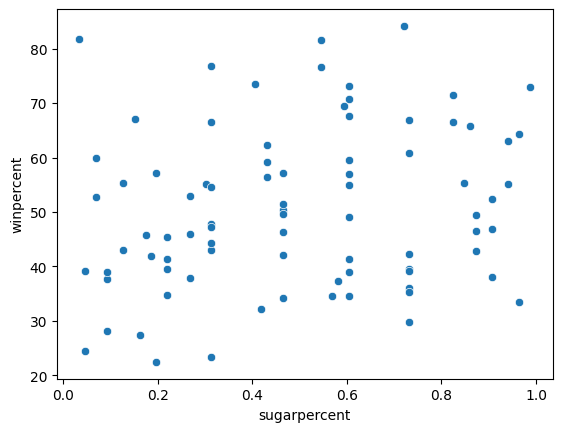

In [7]:
sns.scatterplot(x=candy_data["sugarpercent"], y=candy_data["winpercent"])

#### Part B

Does the scatter plot show a **strong** correlation between the two variables?  If so, are candies with more sugar relatively more or less popular with the survey respondents?

#### B 部分

散点图是否显示两个变量之间存在**强**相关性？  如果是，那么糖分较高的糖果在调查对象中受欢迎的程度是相对较高还是较低？

<Axes: xlabel='sugarpercent', ylabel='winpercent'>

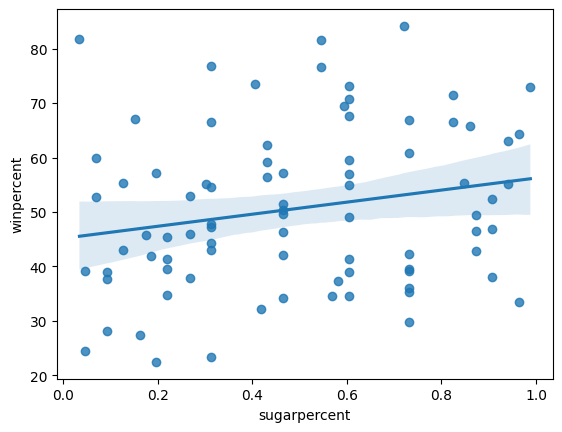

In [8]:
sns.regplot(x=candy_data["sugarpercent"], y=candy_data["winpercent"])

The scatter plot does not show a strong correlation between the two variables. Since there is no clear relationship between the two variables, this tells us that sugar content does not play a strong role in candy popularity.

散点图显示，这两个变量之间没有很强的相关性。由于这两个变量之间没有明显的关系，这就告诉我们，糖含量在糖果受欢迎程度中的作用并不大。

## Step 4: Take a closer look

#### Part A

Create the same scatter plot you created in **Step 3**, but now with a regression line!

绘制与第 **3**步中相同的散点图，但现在要绘制回归线！

上一节画过了！！！

#### Part B

According to the plot above, is there a **slight** correlation between `'winpercent'` and `'sugarpercent'`?  What does this tell you about the candy that people tend to prefer?

根据上面的图表，`'winpercent'`和`'sugarpercent'`之间是否有***轻微的***相关性？这说明人们更倾向于哪种糖果？

Solution: Since the regression line has a slightly positive slope, this tells us that there is a slightly positive correlation between `'winpercent'` and `'sugarpercent'`. Thus, people have a slight preference for candies containing relatively more sugar.

解答：由于回归线的斜率略微为正，这说明`'winpercent'`和`'sugarpercent'`之间略微存在正相关。因此，人们对含糖量相对较高的糖果略有偏好。

## Step 5: Chocolate!

In the code cell below, create a scatter plot to show the relationship between `'pricepercent'` (on the horizontal x-axis) and `'winpercent'` (on the vertical y-axis). Use the `'chocolate'` column to color-code the points.  _Don't add any regression lines just yet -- you'll do that in the next step!_

在下面的代码单元格中，创建一个散点图来显示`'pricepercent'`（在水平 x 轴上）和`'winpercent'`（在垂直 y 轴上）之间的关系。使用`'chocolate'`列对点进行颜色编码。先不要添加任何回归线，下一步再添加！_

<Axes: xlabel='pricepercent', ylabel='winpercent'>

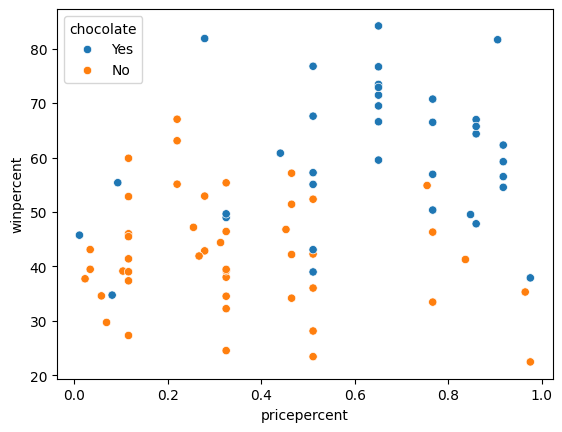

In [9]:
sns.scatterplot(x=candy_data["pricepercent"], y=candy_data["winpercent"], hue=candy_data["chocolate"])

Can you see any interesting patterns in the scatter plot?  We'll investigate this plot further  by adding regression lines in the next step!
您能从散点图中看出任何有趣的模式吗？  在下一步中，我们将通过添加回归线来进一步研究这幅图！

## Step 6: Investigate chocolate

#### Part A

Create the same scatter plot you created in **Step 5**, but now with two regression lines, corresponding to (1) chocolate candies and (2) candies without chocolate.

绘制与第**5**步中相同的散点图，但现在要绘制两条回归线，分别对应 (1) 巧克力糖和 (2) 不含巧克力的糖果。

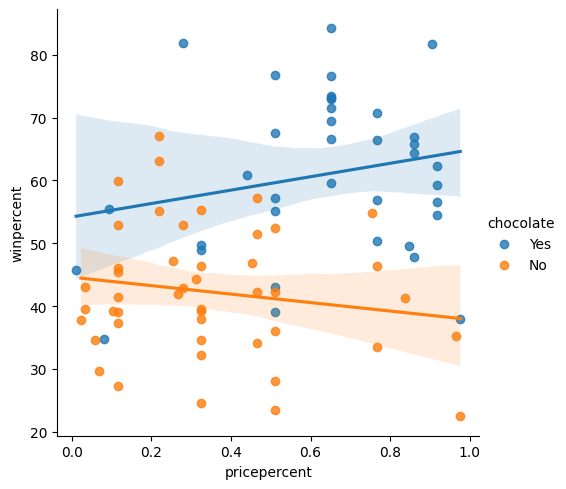

In [10]:
sns.lmplot(x="pricepercent", y="winpercent", hue="chocolate", data=candy_data)

#### Part B

Using the regression lines, what conclusions can you draw about the effects of chocolate and price on candy popularity?

利用回归线，你能得出巧克力和价格对糖果受欢迎程度有什么影响？

Solution: We'll begin with the regression line for chocolate candies. Since this line has a slightly positive slope, we can say that more expensive chocolate candies tend to be more popular (than relatively cheaper chocolate candies). Likewise, since the regression line for candies without chocolate has a negative slope, we can say that if candies don't contain chocolate, they tend to be more popular when they are cheaper. One important note, however, is that the dataset is quite small -- so we shouldn't invest too much trust in these patterns! To inspire more confidence in the results, we should add more candies to the dataset.

解答：我们先来看巧克力糖的回归线。由于这条线的斜率略微为正，因此我们可以说，较贵的巧克力糖往往比相对较便宜的巧克力糖更受欢迎。同样，由于不含巧克力的糖果的回归线具有负斜率，我们可以说，如果糖果不含巧克力，当它们更便宜时，往往更受欢迎。不过，需要注意的是，由于数据集规模较小，我们不应该过于相信这些模式！为了增强对结果的信心，我们应该在数据集中添加更多的糖果。

## Step 7: Everybody loves chocolate.

#### Part A

Create a categorical scatter plot to highlight the relationship between `'chocolate'` and `'winpercent'`.  Put `'chocolate'` on the (horizontal) x-axis, and `'winpercent'` on the (vertical) y-axis.

创建一个分类散点图，突出显示`'chocolate'`和`'winpercent'`之间的关系。  将`'chocolate'`放在（水平）X 轴上，将`'winpercent'`放在（垂直）Y 轴上。

<Axes: xlabel='chocolate', ylabel='winpercent'>

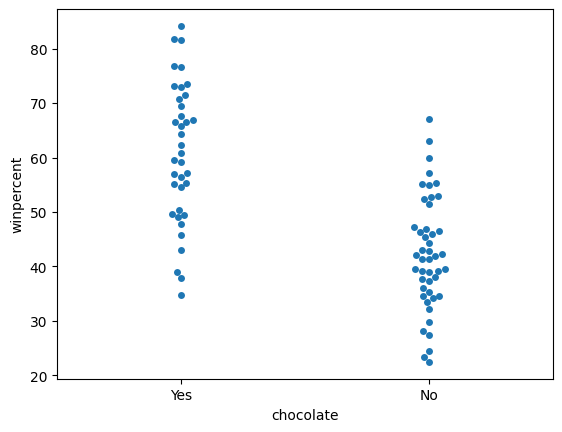

In [11]:
sns.swarmplot(x="chocolate", y="winpercent", data=candy_data)

#### Part B

You decide to dedicate a section of your report to the fact that chocolate candies tend to be more popular than candies without chocolate.  Which plot is more appropriate to tell this story: the plot from **Step 6**, or the plot from **Step 7**?

你决定在你的报告中用一个章节来说明巧克力糖往往比没有巧克力的糖果更受欢迎这一事实。  哪种情节更适合讲述这个故事：第**6**步的情节，还是第**7**步的情节？

Solution: In this case, the categorical scatter plot from Step 7 is the more appropriate plot. While both plots tell the desired story, the plot from Step 6 conveys far more information that could distract from the main point.

解决方案：在这种情况下，步骤 7 中的分类散点图更合适。虽然两个图都讲述了所需的故事，但步骤 6 中的图传达的信息要多得多，可能会偏离重点。